<a href="https://colab.research.google.com/github/anishnarkar/DS5500-Project2/blob/master/xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
#from resnets_utils import *

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

Using TensorFlow backend.


In [0]:
import time
import tensorflow as tf
from sklearn import metrics
import pickle as pi
from collections import Counter

In [0]:
import gc
gc.collect()

239

In [0]:
file = open('/content/drive/My Drive/DS5500_Project_2/processed_images/merged_array_2', 'rb')
merged_array = pi.load(file)
file.close()

In [0]:
np.shape(merged_array)

(65507, 128, 128, 3)

In [0]:
# import pickle
# f=open("/content/drive/My Drive/DS5500_Project_2/processed_images/merged_array","rb")
# try:
#     while True:
#         x=pickle.load(f)
#         # print x
# except EOFError:
#     pass
# f.close()

OSError: ignored

In [0]:
# with open('/content/drive/My Drive/DS5500_Project_2/processed_images/merged_array', mode='rb') as file: # b is important -> binary
#     merged_array = file.read()
# np.shape(merged_array)

OSError: ignored

In [0]:
merged_labels = pd.read_csv('/content/drive/My Drive/DS5500_Project_2/processed_images/all_labels.csv')

In [0]:
# merged_array=new_array.copy()
# np.shape(merged_array)
# type(merged_labels)
merged_labels

,id_code,diagnosis
0,000c1434d8d7,1
1,001639a390f0,1
2,0024cdab0c1e,0
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
65502,22195_right,0
65503,22196_left,1
65504,22196_right,1
65505,22197_left,0


In [0]:
merged_labels.loc[merged_labels['diagnosis'] == 1, 'diagnosis'] = 0
merged_labels.loc[merged_labels['diagnosis'] == 2, 'diagnosis'] = 1
merged_labels.loc[merged_labels['diagnosis'] == 3, 'diagnosis'] = 1
merged_labels.loc[merged_labels['diagnosis'] == 4, 'diagnosis'] = 1

In [0]:
# Undersample each category to the size of count of least category

sample_size = merged_labels['diagnosis'].value_counts().min()

# sample_size=4000
resampled_index = []
for category in np.sort(merged_labels['diagnosis'].unique()):
    temp_index = merged_labels[merged_labels['diagnosis']==category].sample(n=sample_size, replace=False, random_state=500).index
    resampled_index += list(temp_index)

merged_labels = merged_labels.loc[resampled_index,:]
merged_array = merged_array[resampled_index]

In [0]:
np.shape(merged_array)

(6000, 128, 128, 3)

In [0]:
resampled_index = []
temp_index = merged_labels[merged_labels['diagnosis']==0].sample(n=1500, replace=False, random_state=500).index
resampled_index += list(temp_index)
temp_index = merged_labels[merged_labels['diagnosis']==1].sample(n=1500, replace=False, random_state=500).index
resampled_index += list(temp_index)
temp_index = merged_labels[merged_labels['diagnosis']==2].sample(n=1000, replace=False, random_state=500).index
resampled_index += list(temp_index)
temp_index = merged_labels[merged_labels['diagnosis']==3].sample(n=1000, replace=False, random_state=500).index
resampled_index += list(temp_index)
temp_index = merged_labels[merged_labels['diagnosis']==4].sample(n=1000, replace=False, random_state=500).index
resampled_index += list(temp_index)
merged_labels = merged_labels.loc[resampled_index,:]
merged_array = merged_array[resampled_index]


In [0]:
np.shape(merged_labels)

(6000, 2)

In [0]:
print(Counter(y_test))

Counter({1: 611, 0: 589})


In [0]:
X_train, X_test, y_train, y_test = train_test_split(merged_array, merged_labels['diagnosis'], test_size=0.2, random_state=500)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=500)

In [0]:
np.shape(y_train)

(3600,)

In [0]:
# file = open('/content/drive/My Drive/DS5500_Project_2/processed_images/512 by class/array_0.npy', 'rb')
# merged_array = np.load(file)
# file.close()


In [0]:
from keras.utils import to_categorical

In [0]:
train_labels = to_categorical(y_train, 2)
val_labels = to_categorical(y_val, 2)
test_labels= to_categorical(y_test,2)

In [0]:
# np.shape(train_labels)
test_labels

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [0]:
img_sz = 128

# def load_input(labels, IMG_SIZE=img_sz):
#   count=0
#   data_set = np.empty((labels.shape[0], IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)
#   for i, id_code in enumerate(labels):
#     location=f"/content/drive/My Drive/DS5500_Project_2/train_images/{id_code}.png"
#     image = cv2.imread(location)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
#     data_set[i, :, :, :] = image
#     count+=1
#     if(count%100==0):
#       print(count)
#   return data_set

In [0]:
# print("loading training set")
# train_set = load_input(labels = train_x, IMG_SIZE=128)
# print("loading val set")
# val_set = load_input(labels = valid_x, IMG_SIZE=128)
# train_labels = train_labels
# val_labels = val_labels

loading training set
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


NameError: ignored

In [0]:
# import pickle as pi
# file = open('/content/drive/My Drive/DS5500_Project_2/processed_images/train_set_col_res', 'wb')
# pi.dump(train_set, file)
# file.close()

# file = open('/content/drive/My Drive/DS5500_Project_2/processed_images/val_set_col_res', 'wb')
# pi.dump(val_set, file)
# file.close()


In [0]:
np.shape(X_val)

(1600, 128, 128, 3)

In [0]:
# file = open('/content/drive/My Drive/DS5500_Project_2/processed_images/train_set_col_res', 'rb')
# train_set = pi.load(file)
# file.close()

# file = open('/content/drive/My Drive/DS5500_Project_2/processed_images/val_set_col_res', 'rb')
# val_set = pi.load(file)
# file.close()

In [0]:
# train_size = 50
# val_size = 10
# train_set = load_input(labels = train_x[0:train_size], IMG_SIZE=128)
# val_set = load_input(labels = valid_x[0:val_size], IMG_SIZE=128)
# train_labels = train_labels[0:train_size]
# val_labels = val_labels[0:val_size]

In [0]:
from tensorflow.python.keras.applications.resnet import ResNet50

In [0]:
from keras.applications.xception import Xception

In [0]:
img_sz = 128
img_height,img_width = img_sz, img_sz
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = Xception(weights= None, include_top=False, input_shape= (img_height,img_width,3))

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation= 'sigmoid')(x)
model = Model(inputs = base_model.input, outputs = predictions)


In [0]:
from keras.optimizers import SGD, Adam, Adadelta
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adadelta(lr=0.01)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
batch_size=128
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

#Create the image generators
train_generator = train_datagen.flow(X_train, train_labels,batch_size=batch_size)
val_generator = val_datagen.flow(X_val, val_labels, batch_size=batch_size)

In [0]:
ntrain = len(X_train)
nval= len(X_val)
batch_size=128
print('start time:'+str(time.time()))
# model.fit(X_train, train_labels  , epochs = 20, batch_size = 128)
# history=model.fit_generator(X_train, train_labels  , epochs = 20)
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=20,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)
print('end time:'+str(time.time()))

start time:1575336543.7943635
Epoch 1/20
28/28 [==============================] - 67s 2s/step - loss: 0.6945 - acc: 0.4992 - val_loss: 0.6908 - val_acc: 0.5278
Epoch 2/20
28/28 [==============================] - 50s 2s/step - loss: 0.6910 - acc: 0.5348 - val_loss: 0.6860 - val_acc: 0.5438
Epoch 3/20
28/28 [==============================] - 49s 2s/step - loss: 0.6851 - acc: 0.5461 - val_loss: 0.6831 - val_acc: 0.5485
Epoch 4/20
28/28 [==============================] - 49s 2s/step - loss: 0.6868 - acc: 0.5431 - val_loss: 0.6784 - val_acc: 0.5709
Epoch 5/20
28/28 [==============================] - 49s 2s/step - loss: 0.6805 - acc: 0.5664 - val_loss: 0.6790 - val_acc: 0.5886
Epoch 6/20
28/28 [==============================] - 49s 2s/step - loss: 0.6805 - acc: 0.5628 - val_loss: 0.6747 - val_acc: 0.5849
Epoch 7/20
28/28 [==============================] - 49s 2s/step - loss: 0.6813 - acc: 0.5594 - val_loss: 0.6709 - val_acc: 0.5979
Epoch 8/20
28/28 [==============================] - 49s 2s/s

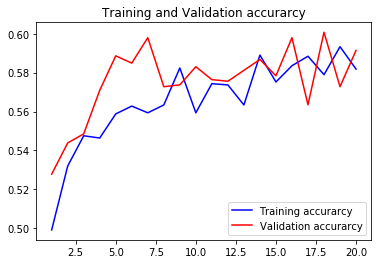

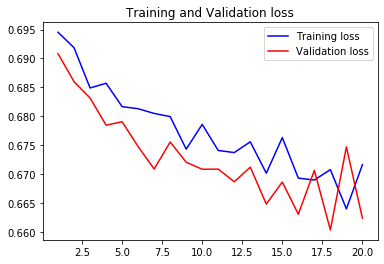

In [0]:

#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [0]:
# from tabulate import tabulate
# print(tabulate(history.history['acc']))
history.history['val_acc']
# from prettytable import PrettyTable
# t = PrettyTable(history.history)
# # t.add_row(['Alice', 24])
# # t.add_row(['Bob', 19])
# print(t)

[0.5277777777777778,
 0.5438432844717112,
 0.5485074617969457,
 0.5708955223880597,
 0.588619402095453,
 0.5848880597014925,
 0.5979477603044083,
 0.5727611940298507,
 0.5736940307403678,
 0.5830223871700799,
 0.5763888888888888,
 0.5755597006029157,
 0.5811567155282888,
 0.5867537313432836,
 0.5783582080656023,
 0.5979477603044083,
 0.5634328349312739,
 0.6007462686567164,
 0.5727611931402292,
 0.5914179104477612]

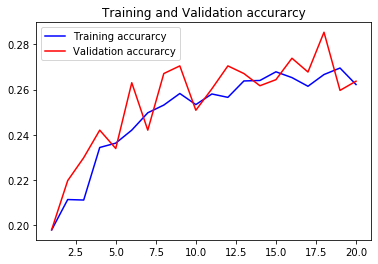

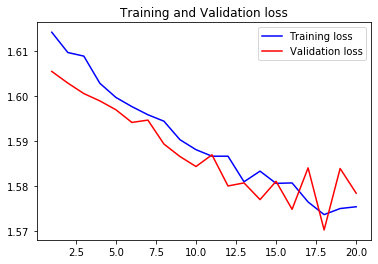

In [0]:
import matplotlib.pyplot as plt

#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [0]:
preds = model.evaluate(X_test, test_labels)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1603/1603 [==============================] - 7s 5ms/step
Loss = 1.609023842005453
Test Accuracy = 0.21459762944479102


In [0]:
pred_value=model.predict(X_train)
val_labels= train_labels.copy()

In [0]:
# np.shape(val_labels)
pred_value

array([[0.6285982 , 0.11792779],
       [0.5191828 , 0.03443292],
       [0.6534121 , 0.1117658 ],
       ...,
       [0.5420238 , 0.17554918],
       [0.20497689, 0.48115048],
       [0.62328446, 0.13523671]], dtype=float32)

In [0]:

pred=np.argmax(pred_value,axis=1)
actual=np.argmax(val_labels,axis=1)
accuracy= metrics.accuracy_score(actual,pred)
# precision= metrics.average_precision_score(actual,pred)
# f1_score= metrics.f1_score(actual,pred)
print("accuracy: "+str(accuracy))
# print("precision:"+ str(precision))
# print("f1 score: "+ str(f1_score))
print("kappa Score: "+str(metrics.cohen_kappa_score(actual,pred, weights='quadratic')))
print("confusion matrix")
print(metrics.confusion_matrix(actual, pred))

accuracy: 0.9210416666666666
kappa Score: 0.8420742855059404
confusion matrix
[[2231  180]
 [ 199 2190]]


In [0]:
print(metrics.classification_report(actual, pred, digits=3))

              precision    recall  f1-score   support

           0      0.918     0.925     0.922      2411
           1      0.924     0.917     0.920      2389

    accuracy                          0.921      4800
   macro avg      0.921     0.921     0.921      4800
weighted avg      0.921     0.921     0.921      4800



In [0]:

print(Counter(actual))
print(Counter(pred))

Counter({1: 611, 0: 589})
Counter({1: 625, 0: 575})


In [0]:
calculate_metrics(pred_value,val_labels)

TypeError: ignored

In [0]:
metrics.confusion_matrix(actual, pred)

array([[258,   5,   8,   0,   0],
       [  4,  28,  18,   3,   3],
       [ 11,  25, 100,   8,   6],
       [  1,   4,  10,  11,   3],
       [  3,  13,  21,   1,   6]])

In [0]:
type(pred_value)

numpy.ndarray

In [0]:
def calculate_metrics(pred, actual):
  pred=np.argmax(pred)
  actual=np.argmax(actual)
  accuracy= metrics.accuracy_score(actual,pred)
  precision= metrics.average_precision_score(actual,pred)
  f1_score= metrics.f1_score(actual,pred)
  print("accuracy: "+str(accuracy))
  print("precision:"+ str(precision))
  print("f1 score: "+ str(f1_score))
  print("confusion matrix")
  print(metrics.confusion_matrix(actual, pred))



In [0]:
calculate_metrics(pred_value,val_set)

TypeError: ignored

In [0]:
np.argmax(pred_value,axis=1)

array([1, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 1,
       1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 3, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0,
       1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2,

In [0]:
np.argmax(val_labels, axis=1)

array([2, 0, 0, 0, 3, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 4, 0, 2, 0, 2, 0, 0,
       2, 0, 1, 0, 0, 0, 2, 2, 0, 4, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 1, 2, 2, 0, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 0, 1, 0, 0,
       0, 0, 4, 1, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 3, 2, 0, 2, 0, 2, 0, 3, 0, 0, 3, 0, 2, 0,
       0, 0, 0, 4, 2, 0, 2, 0, 2, 4, 2, 2, 4, 0, 0, 0, 0, 0, 0, 0, 2, 4,
       0, 0, 2, 2, 2, 2, 2, 0, 4, 4, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 3, 0,
       2, 0, 2, 3, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 3, 0, 2, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 4, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 1, 2, 1, 3, 0, 1, 2, 4, 2, 0, 0, 3, 0, 1, 0, 0, 2, 0, 2, 0,
       2, 2, 1, 1, 2, 2, 4, 2, 0, 0, 0, 2, 2, 2, 0, 4, 0, 2, 4, 2, 0, 0,
       1, 2, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0,
       1, 0, 2, 2, 0, 0, 2, 4, 0, 3, 4, 0, 2, 0, 4,